Exploratory data analysis (EDA) is a crucial component of data science which allows you to understand the basics of what your data looks like and what kinds of questions might be answered. For this task, we are going to clean, sanitise and explore our data. Using the automobile dataset, complete the steps outlined in this notebook by writing code in the cells.

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
# Load the movies dataset
df = pd.read_csv('automobile.txt')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Data Cleansing
#### Clean the data

Identify columns that are redundant or unnecessary. It is always easier to make your decisions based on data which is relevant and concise. Remove the following columns `['normalized-losses', 'symboling']` from the data set as they will not be used in the analysis.

In [18]:
# Code here

# Remove the columns 'normalized-losses' and 'symboling' from the dataframe
df.drop(['normalized-losses', 'symboling'], axis=1, inplace=True)
df.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,13495.0
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,16500.0
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000,19,26,16500.0
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102.0,5500,24,30,13950.0
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500,18,22,17450.0


#### Remove any duplicate rows

In [31]:
# Code here
# Remove duplicate rows from the dataframe
df.drop_duplicates(inplace=True)
df.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88,168,64,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,alfa-romero,gas,std,two,convertible,rwd,front,88,168,64,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,alfa-romero,gas,std,two,hatchback,rwd,front,94,171,65,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,audi,gas,std,four,sedan,fwd,front,99,176,66,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
4,audi,gas,std,four,sedan,4wd,front,99,176,66,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450


#### Remove rows with missing data

Some automobiles in the database have missing values which implies that their values have not been recorded or some information is missing. Discard such entries from the dataframe.

In [35]:
# Code here
# Drop rows with any missing values
df.dropna(inplace=True)
df.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88,168,64,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,alfa-romero,gas,std,two,convertible,rwd,front,88,168,64,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,alfa-romero,gas,std,two,hatchback,rwd,front,94,171,65,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,audi,gas,std,four,sedan,fwd,front,99,176,66,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
4,audi,gas,std,four,sedan,4wd,front,99,176,66,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450


Change columns with numerical data column to an integer data type using numpy’s `int64` method.

In [38]:
# Convert numeric columns to int64
# Convert numeric columns to int64
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].apply(lambda col: col.astype(np.int64))
df.dtypes

make                 object
fuel-type            object
aspiration           object
num-of-doors         object
body-style           object
drive-wheels         object
engine-location      object
wheel-base            int64
length                int64
width                 int64
height                int64
curb-weight           int64
engine-type          object
num-of-cylinders     object
engine-size           int64
fuel-system          object
bore                 object
stroke               object
compression-ratio     int64
horsepower            int64
peak-rpm             object
city-mpg              int64
highway-mpg           int64
price                 int64
dtype: object

### Finding Certain Categories
Locate all automobiles in the "hatchback" genre.

In [39]:
# Create a dataframe with all the cars in the "hatchback" category
hatchback_cars = df[df['body-style'] == 'hatchback']
hatchback_cars.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
2,alfa-romero,gas,std,two,hatchback,rwd,front,94,171,65,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
18,chevrolet,gas,std,two,hatchback,fwd,front,88,141,60,...,61,2bbl,2.91,3.03,9,48,5100,47,53,5151
19,chevrolet,gas,std,two,hatchback,fwd,front,94,155,63,...,90,2bbl,3.03,3.11,9,70,5400,38,43,6295
21,dodge,gas,std,two,hatchback,fwd,front,93,157,63,...,90,2bbl,2.97,3.23,9,68,5500,37,41,5572
22,dodge,gas,std,two,hatchback,fwd,front,93,157,63,...,90,2bbl,2.97,3.23,9,68,5500,31,38,6377


### Now onto the exploration

#### Identify relationships between variables (features)

The main goal here is to identify and create relationships that can help you formulate ideas. We have defined questions to help you identify some relationships to explore.

#### Which are the 5 most expensive cars?

How do the most expensive and cheapest cars compare? Exploring the most expensive cars highlights if some moviecars are worth the money spent on them based on their fuel economy (mpg or miles per gallon)

5 Most Expensive Cars:
              make   body_style  price  city_mpg  highway_mpg
74   mercedes-benz      hardtop  45400        14           16
16             bmw        sedan  41315        16           22
73   mercedes-benz        sedan  40960        14           16
128        porsche  convertible  37028        17           25
17             bmw        sedan  36880        15           20

5 Cheapest Cars:
           make body_style  price  city_mpg  highway_mpg
138      subaru  hatchback   5118        31           36
18    chevrolet  hatchback   5151        47           53
50        mazda  hatchback   5195        30           31
150      toyota  hatchback   5348        35           39
76   mitsubishi  hatchback   5389        37           41


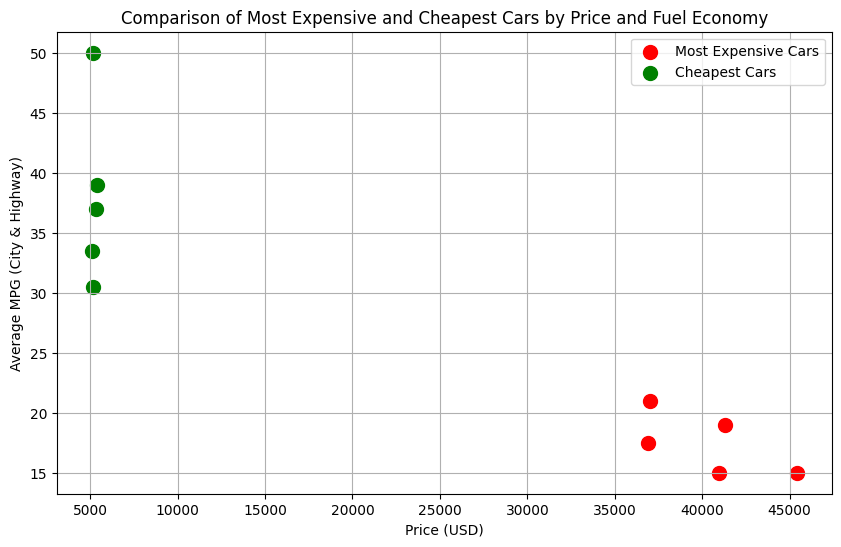

In [44]:
# Code here
df.columns = [col.replace('-', '_') for col in df.columns]
most_expensive_cars = df.sort_values(by='price', ascending=False).head(5)
print("5 Most Expensive Cars:")
print(most_expensive_cars[['make', 'body_style', 'price', 'city_mpg', 'highway_mpg']])

# Sort by price ascending and get top 5 cheapest cars
cheapest_cars = df.sort_values(by='price', ascending=True).head(5)
print("\n5 Cheapest Cars:")
print(cheapest_cars[['make', 'body_style', 'price', 'city_mpg', 'highway_mpg']])

import matplotlib.pyplot as plt
import numpy as np

# Calculate average mpg for comparison
most_expensive_cars['avg_mpg'] = (most_expensive_cars['city_mpg'] + most_expensive_cars['highway_mpg']) / 2
cheapest_cars['avg_mpg'] = (cheapest_cars['city_mpg'] + cheapest_cars['highway_mpg']) / 2

plt.figure(figsize=(10,6))

# Plot most expensive cars
plt.scatter(most_expensive_cars['price'], most_expensive_cars['avg_mpg'], color='red', label='Most Expensive Cars', s=100)

# Plot cheapest cars
plt.scatter(cheapest_cars['price'], cheapest_cars['avg_mpg'], color='green', label='Cheapest Cars', s=100)

plt.xlabel('Price (USD)')
plt.ylabel('Average MPG (City & Highway)')
plt.title('Comparison of Most Expensive and Cheapest Cars by Price and Fuel Economy')
plt.legend()
plt.grid(True)
plt.show()


**Answer**
The most expensive cars might have lower fuel economy due to bigger engines or sporty performance.
The cheapest cars could have higher fuel economy because of smaller engines or economy focus.
This analysis helps decide if paying more for luxury/performance cars also means sacrificing fuel efficiency.



#### Which manufacturer builds the most fuel efficient vehicles?

Compare the average mpg for each vehicle manufacture's vehicles and create a bar plot

make
chevrolet        43.666667
honda            32.923077
volkswagen       31.750000
plymouth         31.142857
dodge            31.055556
toyota           30.203125
nissan           29.972222
mazda            28.823529
subaru           28.541667
mitsubishi       28.038462
isuzu            26.500000
peugot           24.545455
saab             23.833333
alfa-romero      23.500000
volvo            23.500000
bmw              22.375000
audi             21.916667
mercury          21.500000
porsche          21.500000
mercedes-benz    19.750000
jaguar           16.333333
Name: avg_mpg, dtype: float64


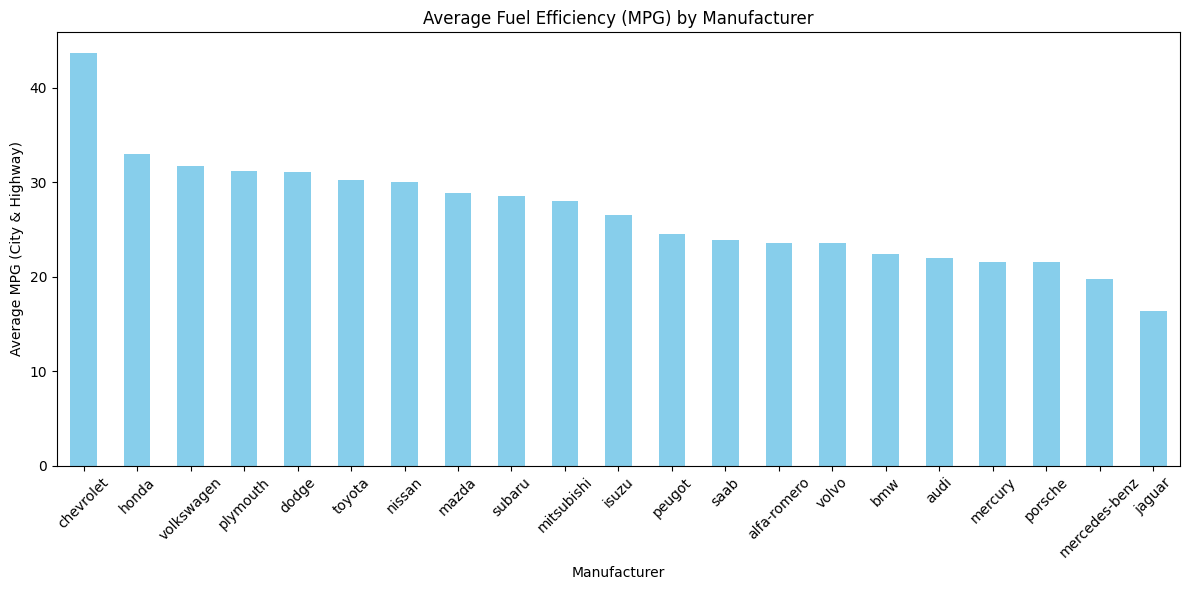

In [45]:
# Code here


df['avg_mpg'] = (df['city_mpg'] + df['highway_mpg']) / 2

avg_mpg_by_make = df.groupby('make')['avg_mpg'].mean().sort_values(ascending=False)
print(avg_mpg_by_make)

plt.figure(figsize=(12,6))
avg_mpg_by_make.plot(kind='bar', color='skyblue')
plt.title('Average Fuel Efficiency (MPG) by Manufacturer')
plt.ylabel('Average MPG (City & Highway)')
plt.xlabel('Manufacturer')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




**Answer**
From the graph above **Chevrolet** manufactures are the ones who seem to build most of the **fuel efficient** vehicles.

#### Which vehicles have the largest engine capacity.
Sort the dataframe based on the engine-size column.

C:\Users\ASDFG\AppData\Local\Temp\ipykernel_12472\2043404876.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='engine_size', y='make', data=top_engines, palette='viridis')


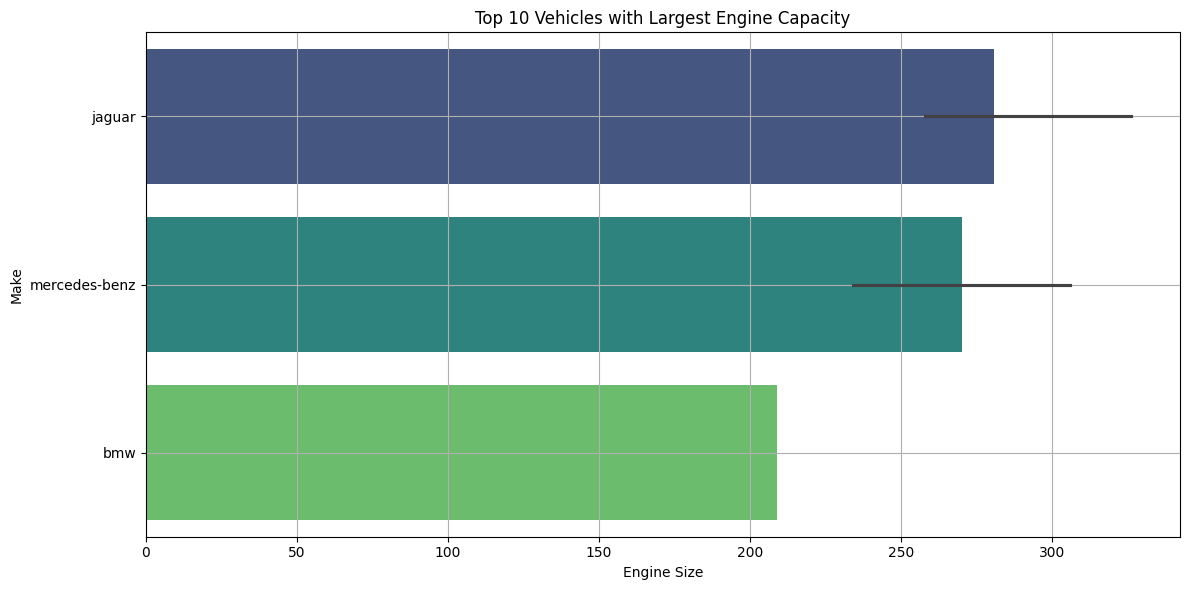

In [53]:
top_engines = df.sort_values(by='engine_size', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='engine_size', y='make', data=top_engines, palette='viridis')
plt.title("Top 10 Vehicles with Largest Engine Capacity")
plt.xlabel("Engine Size")
plt.ylabel("Make")
plt.grid(True)
plt.tight_layout()
plt.show()

These are the three **vehicles** with the **largest engine capacity**

#### Which vehicle manufacturer has the most car models in the dataset

make
toyota        32
nissan        18
mazda         17
mitsubishi    13
honda         13
Name: count, dtype: int64


C:\Users\ASDFG\AppData\Local\Temp\ipykernel_12472\309434239.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=manufacturer_counts.head(10).values, y=manufacturer_counts.head(10).index, palette='Set2')


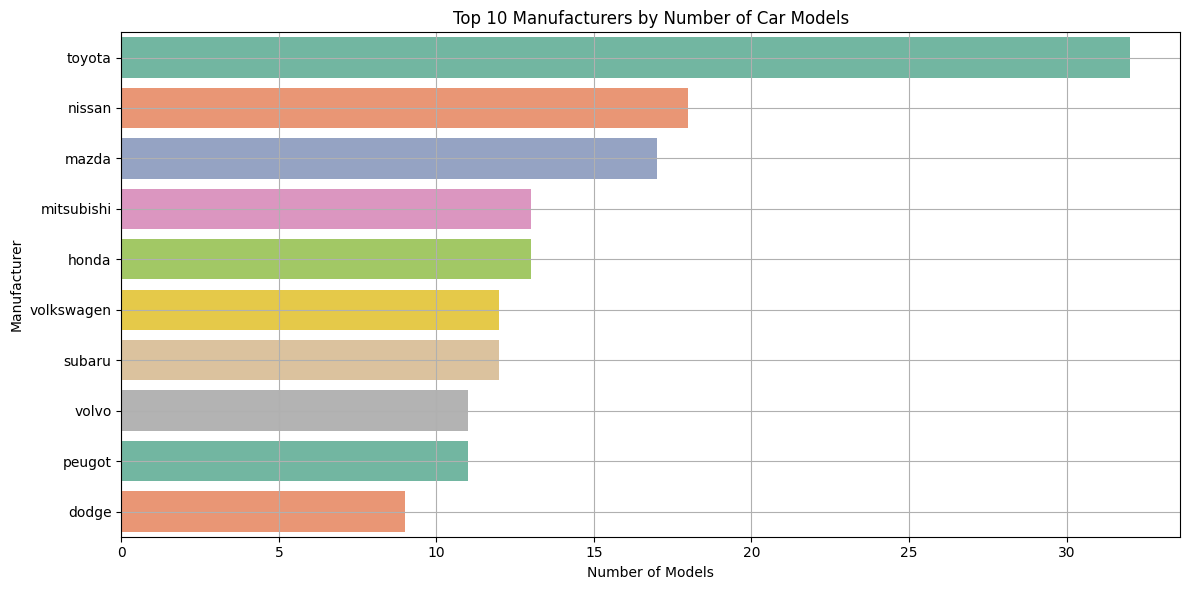

In [52]:
# Code here

# Count the number of models per manufacturer
manufacturer_counts = df['make'].value_counts()

# Display the top manufacturers
print(manufacturer_counts.head())

# Optional: Visualise the top 10
plt.figure(figsize=(12, 6))
sns.barplot(x=manufacturer_counts.head(10).values, y=manufacturer_counts.head(10).index, palette='Set2')
plt.title("Top 10 Manufacturers by Number of Car Models")
plt.xlabel("Number of Models")
plt.ylabel("Manufacturer")
plt.grid(True)
plt.tight_layout()
plt.show()


**Answer:**
From the graph above we can see that **Toyota manufacturers** has the most car models than all the vehicle manufacturers in the dataset.